In [333]:
# Loading libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency

In [334]:
#Setting working directory
os.chdir("D:\Data Science edwisor\Projects\Churn reduction")
os.getcwd()

'D:\\Data Science edwisor\\Projects\\Churn reduction'

In [335]:
#loading data
Train=pd.read_csv("Train_data.csv")
Test=pd.read_csv("Test_data.csv")

In [337]:
Train.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [338]:
Train.dtypes

state                             object
account length                     int64
area code                          int64
phone number                      object
international plan                object
voice mail plan                   object
number vmail messages              int64
total day minutes                float64
total day calls                    int64
total day charge                 float64
total eve minutes                float64
total eve calls                    int64
total eve charge                 float64
total night minutes              float64
total night calls                  int64
total night charge               float64
total intl minutes               float64
total intl calls                   int64
total intl charge                float64
number customer service calls      int64
Churn                             object
dtype: object

In [339]:
Train.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'number customer service calls', 'Churn'],
      dtype='object')

In [340]:
#Categorical variables
cat_names=Train.select_dtypes('object').columns

In [341]:
cat_names

Index(['state', 'phone number', 'international plan', 'voice mail plan',
       'Churn'],
      dtype='object')

In [300]:
#Continous variables
cont_names=Train.select_dtypes(['float64','int64']).columns

In [342]:
cont_names

Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'number customer service calls'],
      dtype='object')

In [343]:
Train.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# Exploratory Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E93A7DF048>,
      dtype=object)

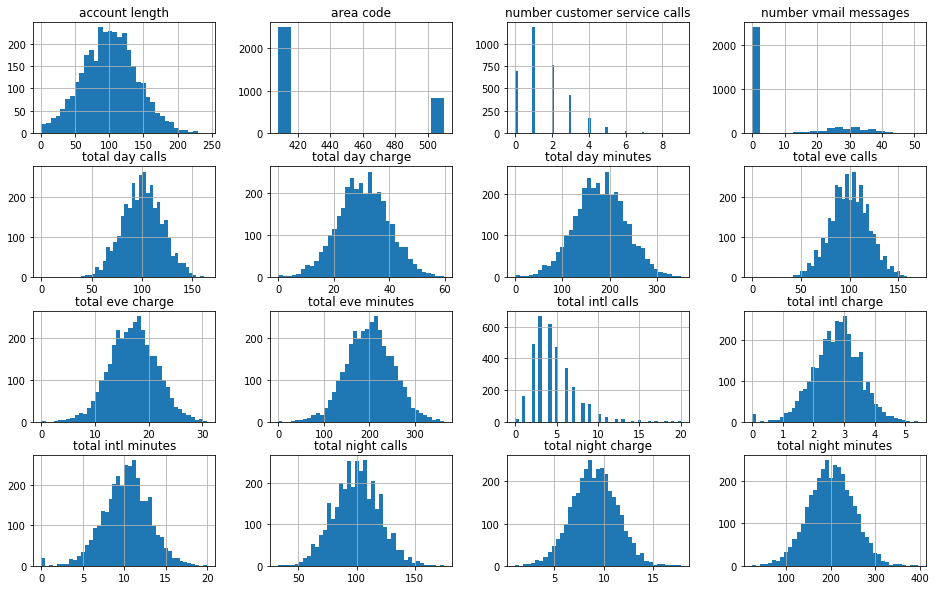

In [344]:
#checking normality
Train.hist(figsize=(16,10),bins='auto')

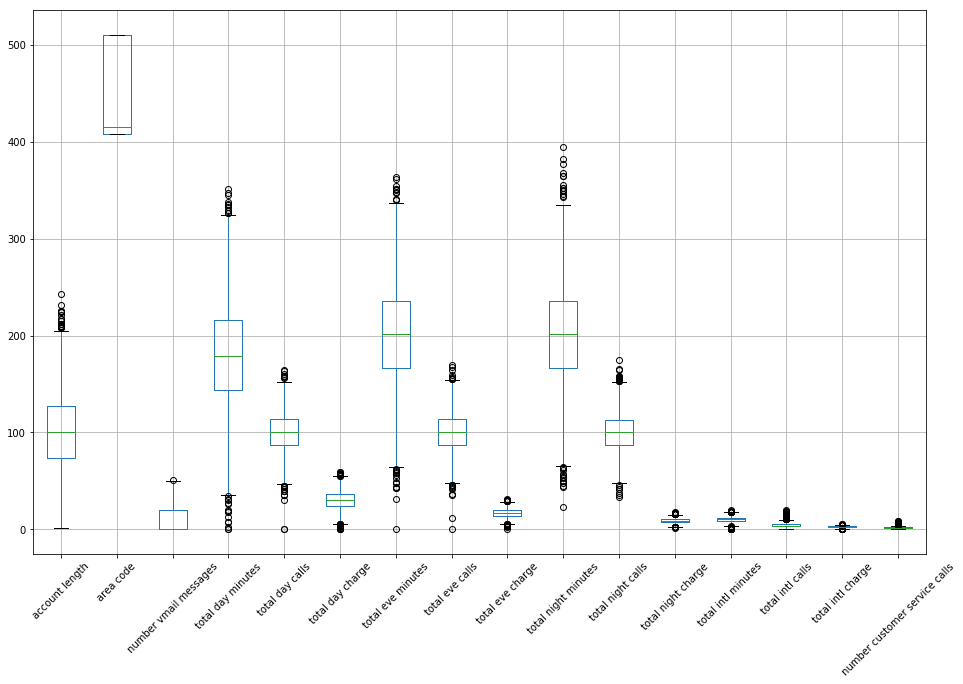

In [346]:
#checking outliers
Train.boxplot(figsize=(16,10),rot=45)

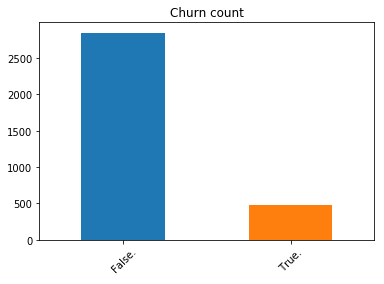

In [347]:
Train['Churn'].value_counts().plot.bar(title="Churn count",rot=45)

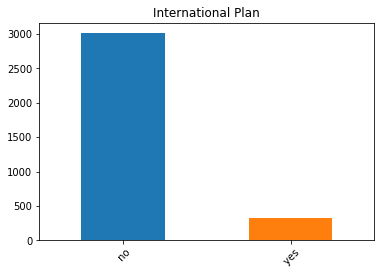

In [348]:
Train['international plan'].value_counts().plot.bar(title='International Plan',rot=45)

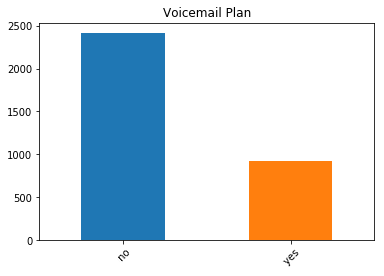

In [349]:
Train['voice mail plan'].value_counts().plot.bar(title='Voicemail Plan',rot=45,)

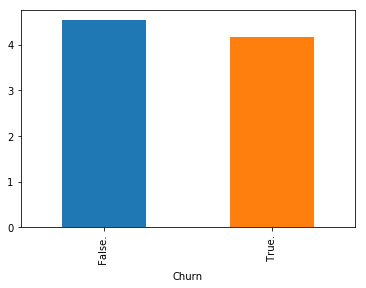

In [350]:
Train.groupby(Train['Churn'])['total intl calls'].mean().plot.bar()

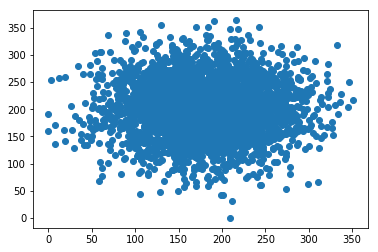

In [351]:
plt.scatter(Train['total day minutes'],Train['total eve minutes'])

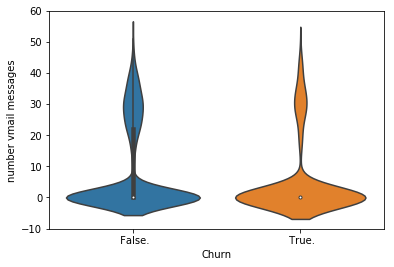

In [352]:
plt.figure(1)
sns.violinplot(x=Train['Churn'],y=(Train['number vmail messages']))

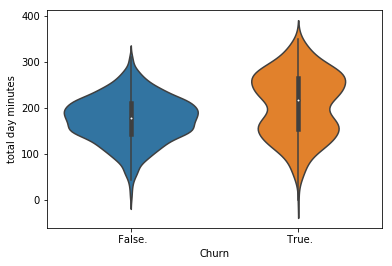

In [353]:
plt.figure(1)
sns.violinplot(x=Train['Churn'],y=Train['total day minutes'])

In [371]:
bins=[0,150,250,400]
Train['day_min_bin']=pd.cut(Train['total day minutes'],bins=bins)

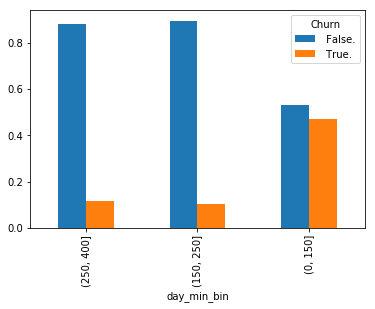

In [355]:
ct = pd.crosstab(Train['day_min_bin'],Train['Churn'])
ct.div(ct.sum(1),axis=0).plot.bar()

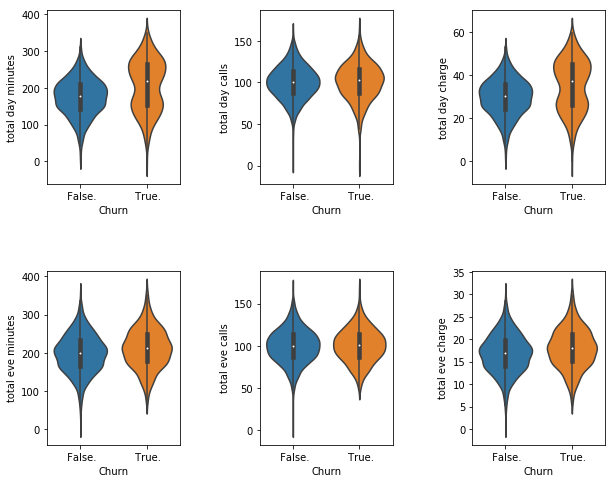

In [356]:
plt.figure(figsize=(10,8))
plt.subplot(231)
plt.subplots_adjust(wspace=0.6,hspace=0.5)
sns.violinplot(x=Train['Churn'],y=Train['total day minutes'])
plt.subplot(232)
sns.violinplot(x=Train['Churn'],y=Train['total day calls'])
plt.subplot(233)
sns.violinplot(x=Train['Churn'],y=Train['total day charge'])
plt.subplot(234)
sns.violinplot(x=Train['Churn'],y=Train['total eve minutes'])
plt.subplot(235)
sns.violinplot(x=Train['Churn'],y=Train['total eve calls'])
plt.subplot(236)
sns.violinplot(x=Train['Churn'],y=Train['total eve charge'])

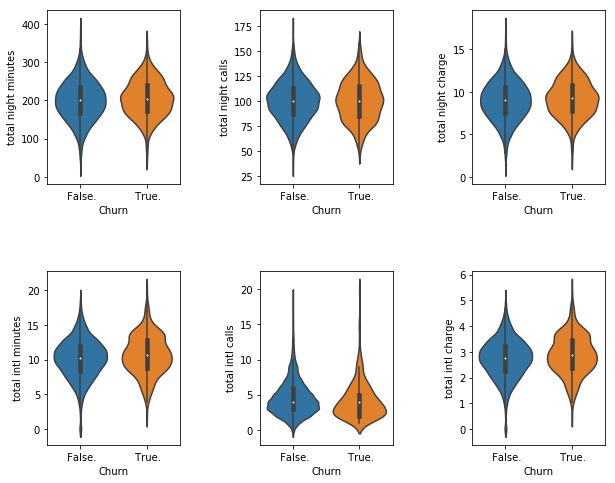

In [317]:
plt.figure(figsize=(10,8))
plt.subplot(231)
plt.subplots_adjust(wspace=0.6,hspace=0.5)
sns.violinplot(x=Train['Churn'],y=Train['total night minutes'])
plt.subplot(232)
sns.violinplot(x=Train['Churn'],y=Train['total night calls'])
plt.subplot(233)
sns.violinplot(x=Train['Churn'],y=Train['total night charge'])
plt.subplot(234)
sns.violinplot(x=Train['Churn'],y=Train['total intl minutes'])
plt.subplot(235)
sns.violinplot(x=Train['Churn'],y=Train['total intl calls'])
plt.subplot(236)
sns.violinplot(x=Train['Churn'],y=Train['total intl charge'])

In [369]:
bins = [0,1,2,3,10]
Train['num_cal_bin']=pd.cut(Train['number customer service calls'],bins=bins)

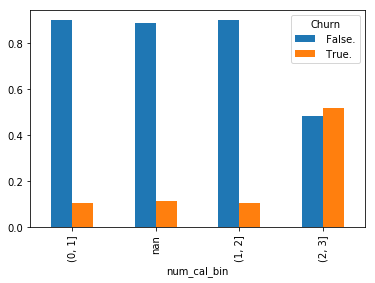

In [370]:
num_cal = pd.crosstab(Train['num_cal_bin'],Train['Churn'])
num_cal.div(num_cal.sum(1),axis=0).plot.bar()

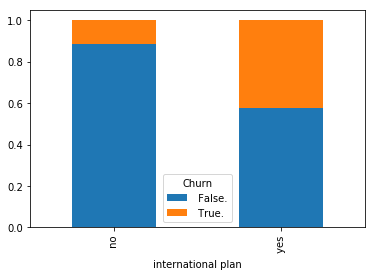

In [359]:
#categorical vs categorical
international_plan = pd.crosstab(Train['international plan'],Train['Churn'])
international_plan.div(int_plan.sum(1),axis=0).plot.bar(stacked=True)

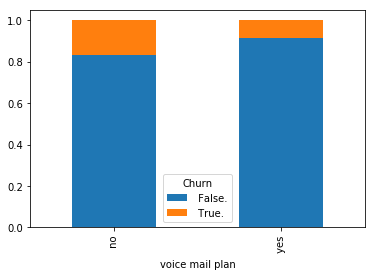

In [360]:
Voice_plan = pd.crosstab(Train['voice mail plan'],Train['Churn'])
Voice_plan.div(Voice_plan.sum(1),axis=0).plot.bar(stacked=True)

In [372]:
Train.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'number customer service calls', 'Churn', 'num_cal_bin', 'day_min_bin'],
      dtype='object')

In [373]:
#dropping columns
Train.drop(['day_min_bin', 'num_cal_bin'],axis=1,inplace=True)

In [374]:
Train_copy = Train.copy()
Test_copy = Test.copy()

In [375]:
Combined=pd.concat([Train,Test],axis=0)

In [376]:
Combined.shape

(5000, 21)

# Handling Missing values

In [367]:
missing_val = pd.DataFrame(Train.isnull().sum()).reset_index()

In [368]:
missing_val.rename(columns={'index' :'Variables', 0 : 'Missing percentage'})

,Variables,Missing percentage
0,state,0
1,account length,0
2,area code,0
3,phone number,0
4,international plan,0
5,voice mail plan,0
6,number vmail messages,0
7,total day minutes,0
8,total day calls,0
9,total day charge,0


# Handling outliers

In [377]:
column_names=list(Train.select_dtypes(['int64','float64']).columns)

In [378]:
column_names.remove('account length')

In [379]:
column_names.remove('area code')

In [380]:
column_names

['number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'number customer service calls']

In [381]:
#for train data
for i in column_names:
    print(i)
    q25,q75=np.percentile(Train.loc[:,i],[25,75])
    iqr=q75-q25
    min=q25-(1.5 * iqr)
    max=q75+(1.5 * iqr)
    print(min,max)
    Train[i].iloc[Train[Train.loc[:,i]<min].index]=np.mean(Train.loc[:,i])
    Train[i].iloc[Train[Train.loc[:,i]>max].index]=np.mean(Train.loc[:,i])

number vmail messages
-30.0 50.0


C:\Users\sasha\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


total day minutes
34.64999999999996 325.45000000000005
total day calls
46.5 154.5
total day charge
5.890000000000001 55.33
total eve minutes
63.54999999999997 338.35
total eve calls
46.5 154.5
total eve charge
5.4 28.759999999999998
total night minutes
64.54999999999998 337.75
total night calls
48.0 152.0
total night charge
2.914999999999999 15.195
total intl minutes
3.1000000000000005 17.5
total intl calls
-1.5 10.5
total intl charge
0.8449999999999995 4.7250000000000005
number customer service calls
-0.5 3.5


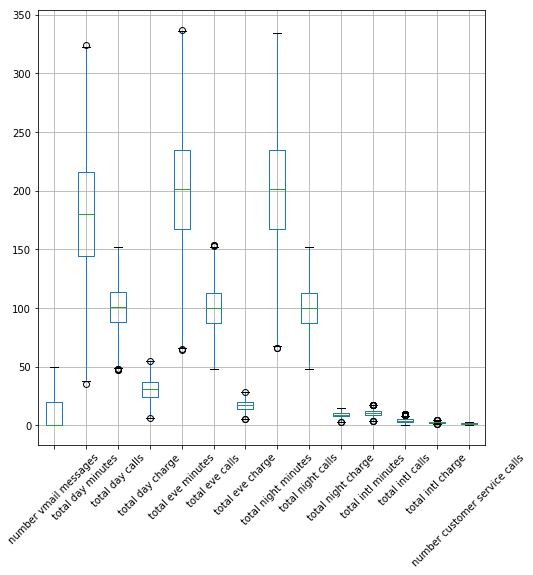

In [382]:
#checking handliers after replacing with mean value
Train[column_names].boxplot(figsize=(8,8),rot=45)

In [383]:
# for test data
for i in column_names:
    print(i)
    q25,q75=np.percentile(Test.loc[:,i],[25,75])
    iqr=q75-q25
    min=q25-(1.5 * iqr)
    max=q75+(1.5 * iqr)
    print(min,max)
    Test[i].iloc[Test[Test.loc[:,i]<min].index]=np.mean(Test.loc[:,i])
    Test[i].iloc[Test[Test.loc[:,i]>max].index]=np.mean(Test.loc[:,i])

number vmail messages
0.0 0.0


C:\Users\sasha\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


total day minutes
35.75 323.75
total day calls
47.0 151.0
total day charge
6.079999999999995 55.040000000000006
total eve minutes
66.3 331.90000000000003
total eve calls
50.5 150.5
total eve charge
5.632500000000002 28.212499999999995
total night minutes
66.92499999999997 332.725
total night calls
45.5 153.5
total night charge
3.0149999999999997 14.975000000000001
total intl minutes
3.499999999999999 17.1
total intl calls
0.0 8.0
total intl charge
0.9399999999999993 4.620000000000001
number customer service calls
-0.5 3.5


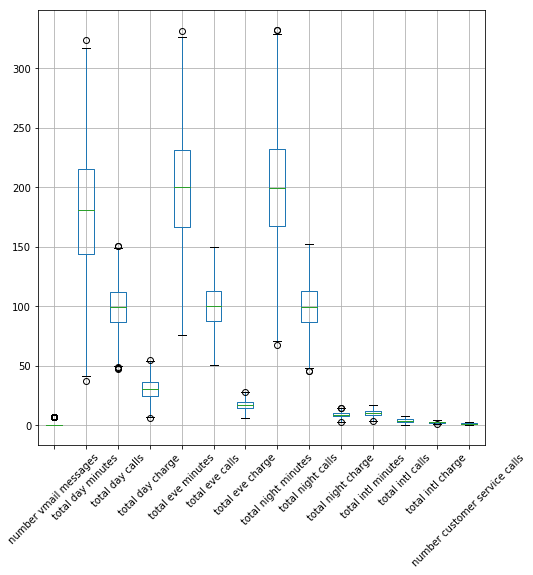

In [384]:
Test[column_names].boxplot(figsize=(8,8),rot=45)

# Feature selection

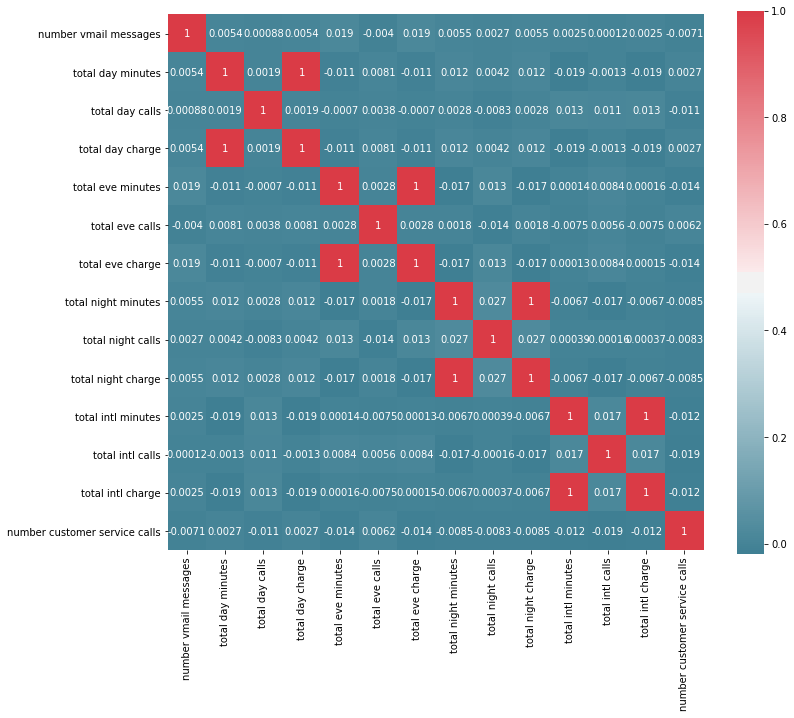

In [385]:
# will check the correlation between all continuous variables
Cont = Combined.loc[:,column_names]
Corr = Cont.corr()
f, ax = plt.subplots(figsize=(12, 10))
#Plot using seaborn library
sns.heatmap(Corr, mask=np.zeros_like(Corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

In [ ]:
#from above we can find 4 highly correlated varialble. its obvious that charges depends on minutes of call
# total day minutes,total eve minutes,total night minutes,total intl minutes
# we can remove these from data

In [386]:
Cat_names = Combined.select_dtypes('object').columns

In [387]:
Cat_names

Index(['state', 'phone number', 'international plan', 'voice mail plan',
       'Churn'],
      dtype='object')

In [388]:
#chi-square test for categorical variables
for i in ['international plan', 'voice mail plan']:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(Train['Churn'], Train[i]))
    print(p)

international plan
2.4931077033159556e-50
voice mail plan
5.15063965903898e-09


In [ ]:
#we could see that probablity is less than 0.05,so the variables are dependent

In [389]:
#Creating features from existing 
Train['day_charge_per_min']=Train['total day charge']/Train['total day minutes']
Train['eve_charge_per_minute']=Train['total eve charge']/Train['total eve minutes']
Train['night_charge_per_minute']=Train['total night charge']/Train['total night minutes']
Train['intl_charge_per_minute']=Train['total intl charge']/Train['total intl minutes']

In [390]:
Test['day_charge_per_min']=Test['total day charge']/Test['total day minutes']
Test['eve_charge_per_minute']=Test['total eve charge']/Test['total eve minutes']
Test['night_charge_per_minute']=Test['total night charge']/Test['total night minutes']
Test['intl_charge_per_minute']=Test['total intl charge']/Test['total intl minutes']
#combined_data['total_charge']=combined_data['day_charge_per_minute']+combined_data['eve_charge_per_minute']+combined_data['night_charge_per_minute']+combined_data['intl_charge_per_minute']

In [391]:
col_names=list(Combined.select_dtypes(['int64','float64']).columns)

In [392]:
col_names.remove('account length')
col_names.remove('area code')

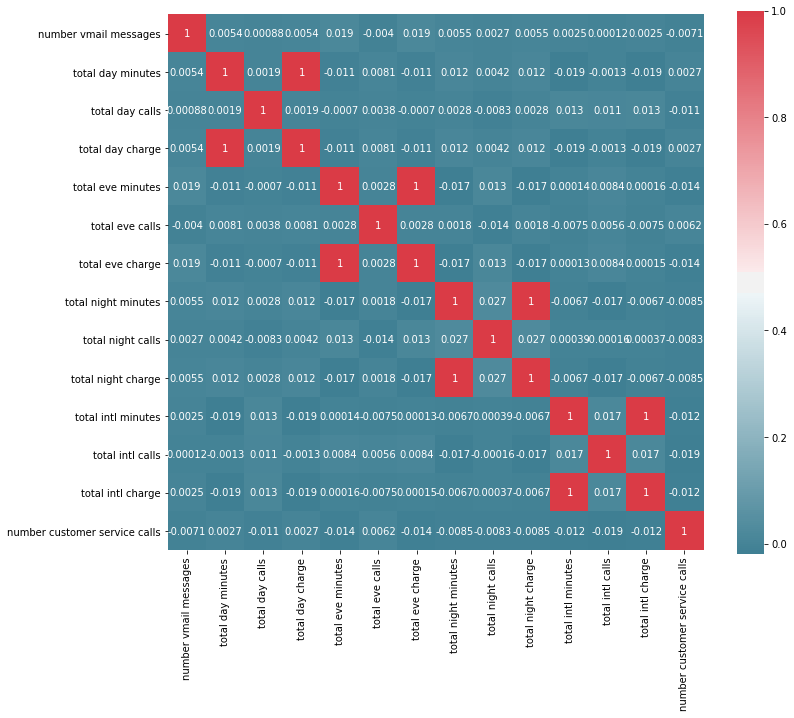

In [393]:
#after removing account lenght,area code checking the correlation
df_cont = Combined.loc[:,col_names]
corr = df_cont.corr()
f, ax = plt.subplots(figsize=(12, 10))
#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

In [394]:
#removing correlated continous variables
remove_var = ['total day minutes','total eve minutes','total night minutes','total intl minutes']
Train.drop(columns=remove_var,inplace = True)
Test.drop(columns=remove_var,inplace = True)

In [395]:
# we can remove state , area code and phone number as they are not helpful for churn prediction
delete = ['state','phone number','area code']
Train.drop(columns=delete,inplace = True)
Test.drop(columns=delete,inplace = True)

# Feature Scaling

In [396]:
Continous=Train.select_dtypes(['int64','float64']).columns.tolist()

In [397]:
Continous

['account length',
 'number vmail messages',
 'total day calls',
 'total day charge',
 'total eve calls',
 'total eve charge',
 'total night calls',
 'total night charge',
 'total intl calls',
 'total intl charge',
 'number customer service calls',
 'day_charge_per_min',
 'eve_charge_per_minute',
 'night_charge_per_minute',
 'intl_charge_per_minute']

In [398]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler(with_std=True)

In [399]:
#standardising the data
Train.loc[:,Continous] = pd.DataFrame(scale.fit_transform(Train.loc[:,Continous]),columns=Continous)
Test.loc[:,Continous] = pd.DataFrame(scale.fit_transform(Test.loc[:,Continous]),columns=Continous)

In [400]:
Categorical=Train.select_dtypes('object').columns

In [401]:
Categorical

Index(['international plan', 'voice mail plan', 'Churn'], dtype='object')

In [402]:
# Changing catogorical variables
#replace Yes with 1 and no with 0

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Train['international plan']= le.fit_transform(Train['international plan'])
Train['voice mail plan']= le.fit_transform(Train['voice mail plan'])
Train['Churn']= le.fit_transform(Train['Churn'])

Test['international plan']= le.fit_transform(Test['international plan'])
Test['voice mail plan']= le.fit_transform(Test['voice mail plan'])
Test['Churn']= le.fit_transform(Test['Churn'])

In [403]:
#checking the data after replacing categorical variable with 0 &1 
Train.head()

,account length,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,number customer service calls,Churn,day_charge_per_min,eve_charge_per_minute,night_charge_per_minute,intl_charge_per_minute
0,0.676489,0,1,1.237649,0.486512,1.617320,-0.060325,-0.076844,-0.472948,0.905567,-0.620729,-0.111922,-0.343493,0,0.407127,0.241426,-0.413736,0.013217
1,0.149065,0,1,1.310823,1.158438,-0.348696,0.146840,-0.115239,0.159415,1.107557,-0.620729,1.325305,-0.343493,0,-0.812246,0.720860,0.471979,0.035103
2,0.902529,0,0,-0.591692,0.693259,1.205127,0.509380,-1.631842,0.212112,-0.788390,0.346178,0.736042,-1.413175,0,0.247605,-1.097655,1.142270,-0.085093
3,-0.428590,1,0,-0.591692,-1.529266,2.268563,-0.630030,-0.004003,-0.578342,-0.081427,1.313085,-1.434170,0.726189,0,0.168507,-0.007990,-0.186439,-0.077645
4,-0.654629,1,0,-0.591692,0.641572,-0.251513,1.130876,-1.077514,1.107959,-0.288007,-0.620729,-0.068805,1.795871,0,0.133447,1.810886,-0.195040,0.102279


# Model building

In [491]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

Y_train = Train['Churn']
X_train = Train.drop('Churn',axis=1)
Y_test = Test['Churn']
X_test = Test.drop('Churn',axis=1)

In [493]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [494]:
churn_prediction=model.predict(X_test)

In [495]:
Conf_matix=pd.crosstab(Y_test,churn_prediction)

In [496]:
Conf_matix

col_0,0,1
Churn,,
0,1306,137
1,70,154


In [497]:
TN=Conf_matix.iloc[0,0]
FP=Conf_matix.iloc[0,1]
FN=Conf_matix.iloc[1,0]
TP=Conf_matix.iloc[1,1]

In [460]:
Accuracy= (TN+TP)/(TN+FP+FN+TP)

In [498]:
Accuracy

0.8752249550089982

In [499]:
accuracy_score(Y_test,churn_prediction)

0.8758248350329934

In [500]:
Specificity = TN/(TN+FP)

In [501]:
Specificity

0.9050589050589051

In [502]:
Recall = TP/(TP+FN)

In [503]:
Recall

0.6875

In [504]:
FNR=(FN*100)/(FN+TP)

In [505]:
FNR

31.25

In [506]:
Precision = TP/(TP+FP)
Precision

0.5292096219931272

In [507]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier


In [508]:
rf_model = RandomForestClassifier(n_estimators=5)
rf_model.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [509]:
churn_pred1 = rf_model.predict(X_test)

In [510]:
accuracy_score(Y_test,churn_pred1)

0.9286142771445711

In [511]:
Cm=pd.crosstab(Y_test,churn_pred1)
Cm

col_0,0,1
Churn,,
0,1416,27
1,92,132


In [512]:
TN=Cm.iloc[0,0]
FP=Cm.iloc[0,1]
FN=Cm.iloc[1,0]
TP=Cm.iloc[1,1]

In [513]:
Accuracy= (TN+TP)/(TN+FP+FN+TP)
Accuracy

0.9286142771445711

In [514]:
Specificity = TN/(TN+FP)

In [476]:
Specificity

0.918918918918919

In [515]:
Recall = TP/(TP+FN)

In [516]:
Recall

0.5892857142857143

In [518]:
FNR=(FN*100)/(FN+TP)

In [521]:
FNR

41.07142857142857

In [522]:
Precision = TP/(TP+FP)
Precision

0.8301886792452831

In [523]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

In [525]:
lg_model = LogisticRegression()
lg_model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [526]:
churn_pred2=lg_model.predict(X_test)

In [527]:
accuracy_score(Y_test,churn_pred2)

0.8752249550089982

In [528]:
Cm1=pd.crosstab(Y_test,churn_pred2)
Cm1

col_0,0,1
Churn,,
0,1427,16
1,192,32


In [529]:
TN=Cm1.iloc[0,0]
FP=Cm1.iloc[0,1]
FN=Cm1.iloc[1,0]
TP=Cm1.iloc[1,1]

In [530]:
Accuracy= (TN+TP)/(TN+FP+FN+TP)
Accuracy

0.8752249550089982

In [531]:
Specificity = TN/(TN+FP)
Specificity

0.988911988911989

In [532]:
Recall = TP/(TP+FN)
Recall

0.14285714285714285

In [533]:
FNR=(FN*100)/(FN+TP)
FNR

85.71428571428571

In [534]:
Precision = TP/(TP+FP)
Precision

0.6666666666666666